In [1]:
import matplotlib.pyplot as plt

def plot_over_epochs(y_values: list, title: str, y_label: str, legend: str):
    plt.figure(figsize=(4, 4))
    plt.plot(list(range(len(y_values))), y_values, label=legend)
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [2]:
from neural_network import NeuralNetwork
from math_functions.function_enums import LossFunction, ActivationFunction, Metrics
from dataset_reader import read_monk, read_cup, read_old_cup
from validation import kfold_cv, splitter
from sklearn.utils import shuffle
import numpy as np

# 1. MONKS

### 1.1. Monks-1

In [82]:
train_data, train_target = read_monk('datasets/monks/monks-1.train')
test_data, test_target = read_monk('datasets/monks/monks-1.test')
train_data, train_target = shuffle(train_data, train_target)

# train_data, val_data, train_target, val_target = splitter(train_data, train_target, 0.66)
# train_data, train_target = shuffle(train_data, train_target)
# val_data, val_target = shuffle(train_data, train_target)

In [83]:
nn_monk1 = NeuralNetwork(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.05,
    reg_lambda=0,
    mom_alpha=0.9,
    nesterov=False,
    epochs=500, 
    batch_size=1, 
    classification=True, 
    early_stopping=False,
    fast_stopping=False, 
    linear_decay=True,
    patience=30, 
    tollerance=0.00001,
    tao=500, 
    verbose=False
    )

nn_monk1.train_net(train_data, train_target)

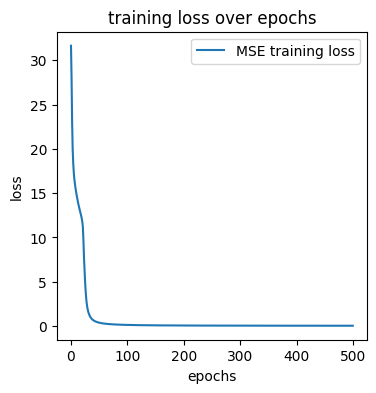

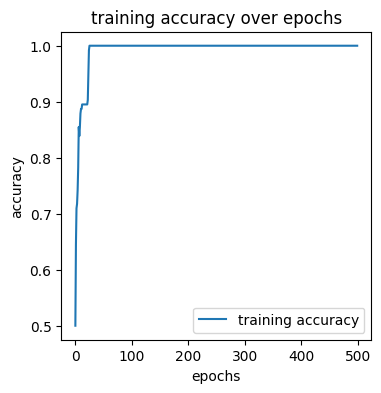

In [86]:
plot_over_epochs(y_values=nn_monk1.training_losses, title='training loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk1.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
# plot_over_epochs(y_values=nn_monk1.validation_losses, title='validation loss over epochs', y_label='loss', legend='MSE validation loss')
# plot_over_epochs(y_values=nn_monk1.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [85]:
test_accuracy = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk1.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {nn_monk1.training_evaluations[-1]} \nMSE: {nn_monk1.training_losses[-1]}")

TEST RESULTS:
Accuracy: 1.0 
MSE: 0.00037469182697207016 
MEE: 0.016182480319384247
------------------
TRAINING RESULTS:
Accuracy: 1.0 
MSE: 0.032293754096759476


### 1.2. Monks-2

In [53]:
train_data, train_target = read_monk('datasets/monks/monks-2.train')
test_data, test_target = read_monk('datasets/monks/monks-2.test')
train_data, train_target = shuffle(train_data, train_target)

train_data, val_data, train_target, val_target = splitter(train_data, train_target, 0.66)
train_data, train_target = shuffle(train_data, train_target)
val_data, val_target = shuffle(train_data, train_target)

In [54]:
nn_monk2 = NeuralNetwork(
    n_hidden_layers=1,
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value,
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.2,
    reg_lambda=0,
    mom_alpha=0.9,
    epochs=1000, 
    batch_size=1, 
    classification=True, 
    early_stopping=True, 
    linear_decay=True,
    patience=20, 
    tollerance=0.00001,
    tao=300, 
    verbose=False
    )

nn_monk2.train_net(train_data, train_target, test_data, test_target)

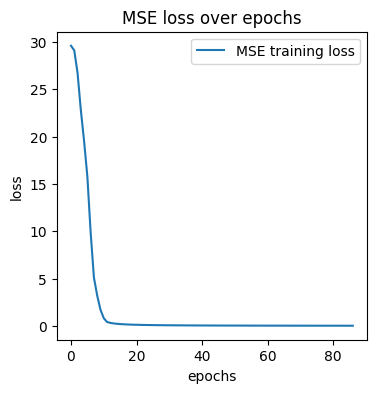

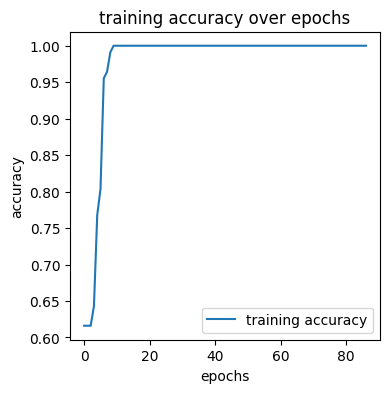

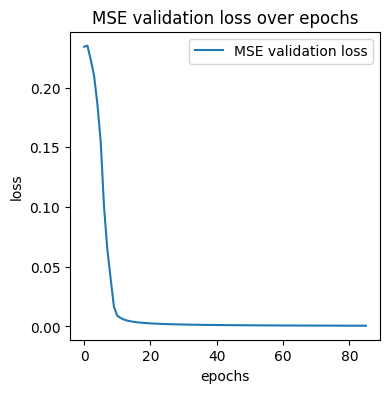

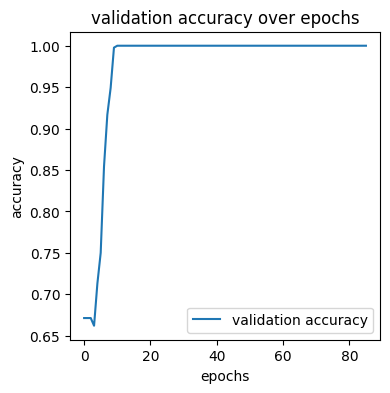

In [55]:
plot_over_epochs(y_values=nn_monk2.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk2.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk2.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk2.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [56]:
test_accuracy = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk2.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {nn_monk2.training_evaluations[-1]} \nMSE: {nn_monk2.training_losses[-1]}")

TEST RESULTS:
Accuracy: 1.0 
MSE: 0.0005626081436743705 
MEE: 0.017728990431088953
------------------
TRAINING RESULTS:
Accuracy: 1.0 
MSE: 0.020915174244635466


### 1.3. Monks-3

In [44]:
train_data, train_target = read_monk('datasets/monks/monks-3.train')
test_data, test_target = read_monk('datasets/monks/monks-3.test')
train_data, train_target = shuffle(train_data, train_target)

train_data, val_data, train_target, val_target = splitter(train_data, train_target, 0.66)
train_data, train_target = shuffle(train_data, train_target)
val_data, val_target = shuffle(train_data, train_target)

In [48]:
nn_monk3 = NeuralNetwork(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.005, 
    reg_lambda=0.0005,
    mom_alpha=0.9,
    nesterov=False,
    epochs=500, 
    batch_size=4, 
    classification=True, 
    early_stopping=True,
    fast_stopping=False, 
    linear_decay=True,
    patience=30, 
    tollerance=0.001, 
    tao=500,
    verbose=False
    )
nn_monk3.train_net(train_data, train_target, val_data, val_target)

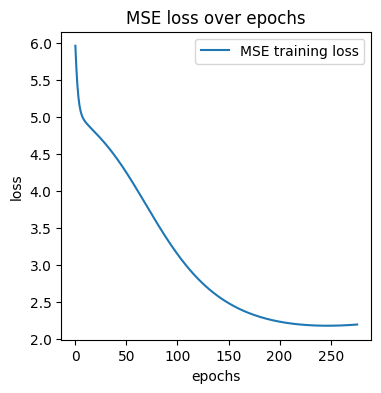

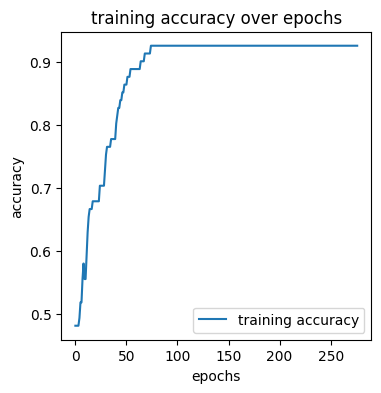

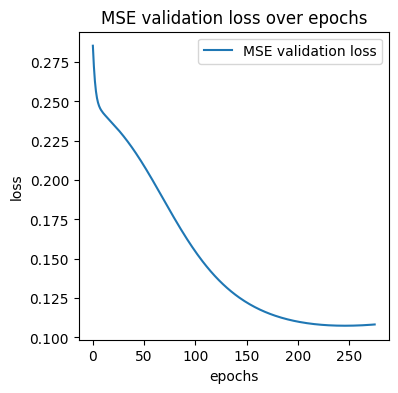

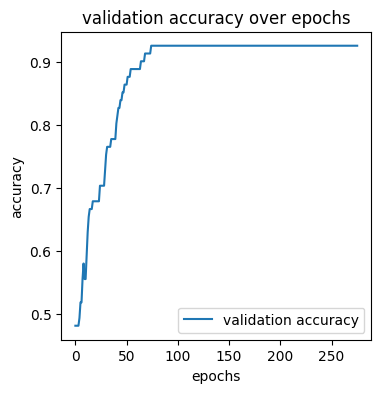

In [49]:
plot_over_epochs(y_values=nn_monk3.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk3.training_evaluations, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk3.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=nn_monk3.validation_evaluations, title='validation accuracy over epochs', y_label='accuracy', legend='validation accuracy')

In [52]:
test_accuracy = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.ACCURACY.value)
test_mse = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.MSE.value)
test_mee = nn_monk3.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {nn_monk3.training_evaluations[-1]} \nMSE: {nn_monk3.training_losses[-1]}")

TEST RESULTS:
Accuracy: 0.9722222222222222 
MSE: 0.1002279504384948 
MEE: 0.30277555719759125
------------------
TRAINING RESULTS:
Accuracy: 0.9259259259259259 
MSE: 2.196567153635146


### 1.4. Monks-3 Kfold-cv

In [3]:
data, target = read_monk('datasets/monks/monks-3.train')

net = NeuralNetwork(
    n_hidden_layers=1, 
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.05, 
    reg_lambda=0,
    mom_alpha=0.6,
    nesterov=False,
    epochs=500, 
    batch_size=1, 
    classification=True, 
    early_stopping=True,
    fast_stopping=False, 
    linear_decay=True,
    patience=30, 
    tollerance=0.001, 
    tao=300,
    verbose=False
)

metrics = [Metrics.MSE.value, Metrics.MEE.value, Metrics.ACCURACY.value]
kfold_cv(5, data, target, metrics, net, verbose=True)   


Fold 1:
Fold validation mse: 0.1588180651674066
Fold validation mee: 0.20503978920686683
Fold validation accuracy: 0.84
Training loss: 0.8378067451916249
Training evaluation accuracy: 1.0
Internal validation loss: 0.06922539909022284
Internal validation evaluation accuracy: 0.90625

Fold 2:
Fold validation mse: 0.033025157742503135
Fold validation mee: 0.12435062212485735
Fold validation accuracy: 1.0
Training loss: 3.209941911916536
Training evaluation accuracy: 0.9230769230769231
Internal validation loss: 0.05923602960820899
Internal validation evaluation accuracy: 0.90625

Fold 3:
Fold validation mse: 0.06877066296901722
Fold validation mee: 0.1876023795503338
Fold validation accuracy: 0.9166666666666666
Training loss: 3.373906642351381
Training evaluation accuracy: 0.9384615384615385
Internal validation loss: 0.0625128881208656
Internal validation evaluation accuracy: 0.9090909090909091

Fold 4:
Fold validation mse: 0.22271883658204983
Fold validation mee: 0.3440732403010318
Fold 

{'tr_losses_mean': 2.931452313898588,
 'tr_losses_std': 1.0583923089311562,
 'internal_val_losses_mean': 0.07721564036503895,
 'internal_val_losses_std': 0.027239819607358096,
 'tr_evals_accuracy_mean': 0.9476923076923077,
 'tr_evals_accuracy_std': 0.02682399349871183,
 'internal_val_evals_accuracy_mean': 0.8837121212121213,
 'internal_val_evals_accuracy_std': 0.03457879006965625,
 'validation_mse_mean': 0.10530350917553463,
 'validation_mee_mean': 0.20206050928201544,
 'validation_accuracy_mean': 0.8846666666666666,
 'validation_mse_std': 0.0735767719748801,
 'validation_mee_std': 0.0764391657536791,
 'validation_accuracy_std': 0.10280185904069157}

# 2. OLD ML_CUP

best results so far have been obtained with a net of [30, 30, 30] and no regularization (all the previous run got lower results probably because of the l2 term)
    
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False

    Training MEE: 1.2126581787788764 
    Validation_mee: 1.4571116267347475 
    Test MEE: 1.3865713888122835


Also the model does not seem to overfit even with [256, 256, 128] layers

#TODO try tanh

In [41]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = splitter(data, targets, 0.8)
train_data, train_target = shuffle(train_data, train_target)
test_data, test_target = shuffle(test_data, test_data)

train_data, validation_data, train_target, validation_target = splitter(train_data, train_target, 0.66)
train_data, train_target = shuffle(train_data, train_target)
validation_data, validation_target = shuffle(validation_data, validation_target)

net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False
)
net.train_net(train_data, train_target, validation_data, validation_target)

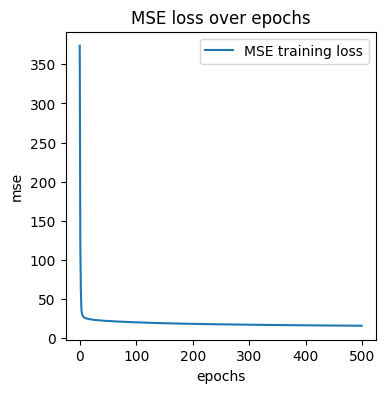

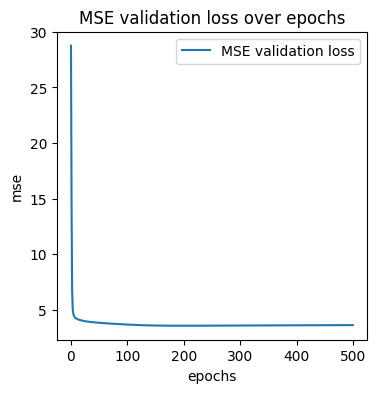

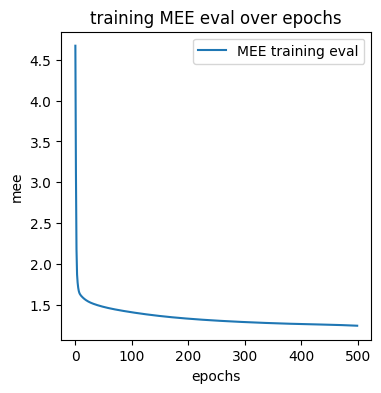

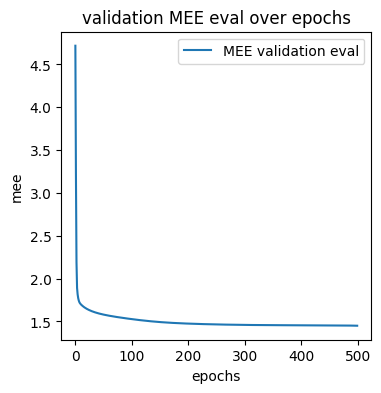

In [42]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='mse', legend='MSE training loss')
plot_over_epochs(y_values=net.validation_losses, title='MSE validation loss over epochs', y_label='mse', legend='MSE validation loss')
plot_over_epochs(y_values=net.training_evaluations, title='training MEE eval over epochs', y_label='mee', legend='MEE training eval')
plot_over_epochs(y_values=net.validation_evaluations, title='validation MEE eval over epochs', y_label='mee', legend='MEE validation eval')

In [43]:
test_mee = net.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
training_mee = net.training_evaluations[-1]
validation_mee = net.validation_evaluations[-1]
print(f"Training MEE: {training_mee} \nValidation_mee: {validation_mee} \nTest MEE: {test_mee}")

Training MEE: 1.2466364424174454 
Validation_mee: 1.4504117731867048 
Test MEE: 1.3887935131411342


In [3]:
data, targets = read_old_cup('datasets/cup/ML-CUP22-TR.csv')
train_data, test_data, train_target, test_target = splitter(data, targets, 0.8)

net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=True, 
    fast_stopping=True,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False
)

metrics_results = kfold_cv(5, train_data, train_target, [Metrics.MSE.value, Metrics.MEE.value], net, verbose=True)


Fold 1:
Fold validation mse: 4.095106479300631
Fold validation mee: 1.5508066834241208
Training loss: 13.324945051054979
Training evaluation mee: 1.3010493329537385
Internal validation loss: 3.1989877324149543
Internal validation evaluation mee: 1.3808091505693487

Fold 2:
Fold validation mse: 3.3951796257260174
Fold validation mee: 1.4332585343286504
Training loss: 13.459489099198198
Training evaluation mee: 1.2762936991910503
Internal validation loss: 3.4054347406520007
Internal validation evaluation mee: 1.4080381174984122

Fold 3:
Fold validation mse: 3.6750202967039134
Fold validation mee: 1.4820836689516241
Training loss: 13.029847210321451
Training evaluation mee: 1.2697447949520428
Internal validation loss: 3.1686389981737033
Internal validation evaluation mee: 1.3826291471915706

Fold 4:
Fold validation mse: 4.3131320913818385
Fold validation mee: 1.6199763765956625
Training loss: 12.602448977904954
Training evaluation mee: 1.2579886423799151
Internal validation loss: 3.70127

In [4]:
metrics_results

{'tr_losses_mean': 13.383239632516398,
 'tr_losses_std': 0.6308245184648097,
 'internal_val_losses_mean': 3.5164468508411795,
 'internal_val_losses_std': 0.35158106922657517,
 'tr_evals_mean': 1.2903462821712235,
 'tr_evals_std': 0.03147740019376786,
 'internal_val_evals_mean': 1.4436457990609717,
 'internal_val_evals_std': 0.07383036821626725,
 'validation_mse_mean': 3.7910605602860548,
 'validation_mee_mean': 1.502812195509533,
 'validation_mse_std': 0.3560643049566491,
 'validation_mee_std': 0.07335500970330702}

In [5]:
net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[30, 30, 30], 
    n_output_units=2, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False
)
net.train_net(train_data, train_target)


# 3. ML_CUP

best result so far:

    n_hidden_layers=3, 
    hidden_layer_sizes=[64, 64, 32], 
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False

    Training MEE: 0.5094019000287047 
    Validation_mee: 0.8019135798639437 
    Test MEE: 0.8425731318371572

3 mins of training

In [87]:
data, targets = read_cup('datasets/cup/CUP_TR.csv')
train_data, test_data, train_target, test_target = splitter(data, targets, 0.8)

train_data, validation_data, train_target, validation_target = splitter(train_data, train_target, 0.66)
train_data, train_target = shuffle(train_data, train_target)
validation_data, validation_target = shuffle(validation_data, validation_target)

net = NeuralNetwork(
    n_hidden_layers=3, 
    hidden_layer_sizes=[64, 64, 32], 
    n_output_units=3, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.MEE.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.IDENTITY.value, 
    learning_rate=0.08, 
    reg_lambda=0,
    mom_alpha=0.8,
    nesterov=False,
    epochs=500, 
    batch_size=128, 
    classification=False, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=True,
    patience=20, 
    tollerance=0.0001,
    tao=500, 
    verbose=False
)
net.train_net(train_data, train_target, validation_data, validation_target)

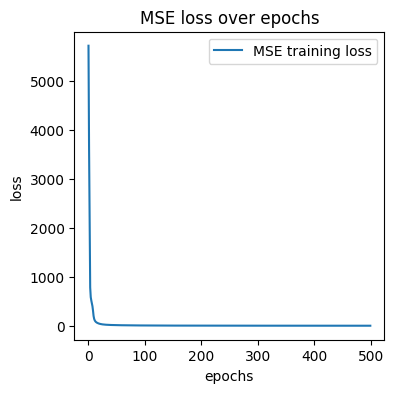

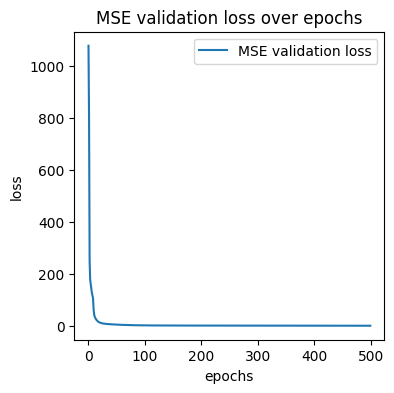

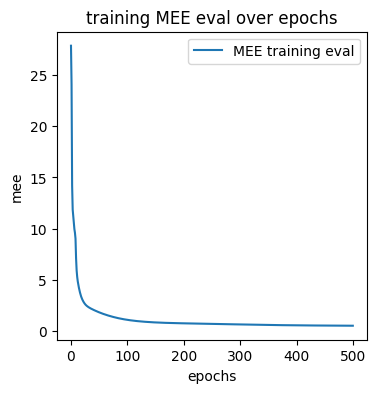

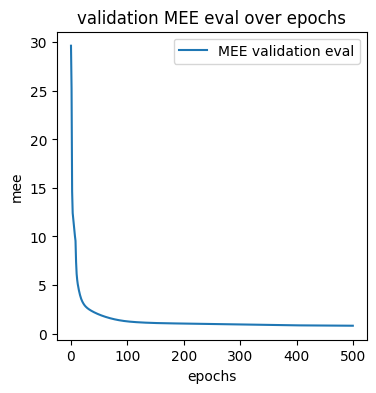

In [88]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=net.validation_losses, title='MSE validation loss over epochs', y_label='loss', legend='MSE validation loss')
plot_over_epochs(y_values=net.training_evaluations, title='training MEE eval over epochs', y_label='mee', legend='MEE training eval')
plot_over_epochs(y_values=net.validation_evaluations, title='validation MEE eval over epochs', y_label='mee', legend='MEE validation eval')

In [89]:
test_mee = net.predict_and_evaluate(test_data, test_target, Metrics.MEE.value)
training_mee = net.training_evaluations[-1]
validation_mee = net.validation_evaluations[-1]
print(f"Training MEE: {training_mee} \nValidation_mee: {validation_mee} \nTest MEE: {test_mee}")

Training MEE: 0.5094019000287047 
Validation_mee: 0.8019135798639437 
Test MEE: 0.8425731318371572
